## Project 5: Restaurant Revenue Prediction                                



### PHYS 247 - Spring 2020 
### Silvia Cabellos     





Abstract : 


In this project, you will use data that is provided by TAB Food Investments (TFI) to predict
revenue of the restaurant. The training sample includes the information of 137 restaurants and you
will build a model based on the training sample and will apply it to 100000 restaurants in the test
sample.


For the former, you will share your .ipynb file as you do in your homework and for the latter,
you need to write a short report (2-5 pages) which includes a brief description of the project and data
set, data processing and cleaning procedure, plots and figures, explaining the method you used to
build a model and evaluating your model’s performance. Both of them are due on June 12, 11:59 p.m.

In [2]:
import pandas as pd
import numpy as np 
import random 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'C:\Users\scabellos\OneDrive - Urban Science\User Documents\MastersDegree\AppliedDataScience\Project\restaurant-revenue-prediction\train.csv\train.csv')
test=pd.read_csv(r'C:\Users\scabellos\OneDrive - Urban Science\User Documents\MastersDegree\AppliedDataScience\Project\restaurant-revenue-prediction\test.csv\test.csv')

In [4]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [5]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [6]:
#checking for duplicates 
dups = data[data.duplicated()]
print("These are the duplicate records in the data set=",len(dups))


These are the duplicate records in the data set= 0


In [7]:
#checking for nulls 
nulls=data.isnull().sum()
print("The number of nulls per feature is =",sum(nulls))


The number of nulls per feature is = 0


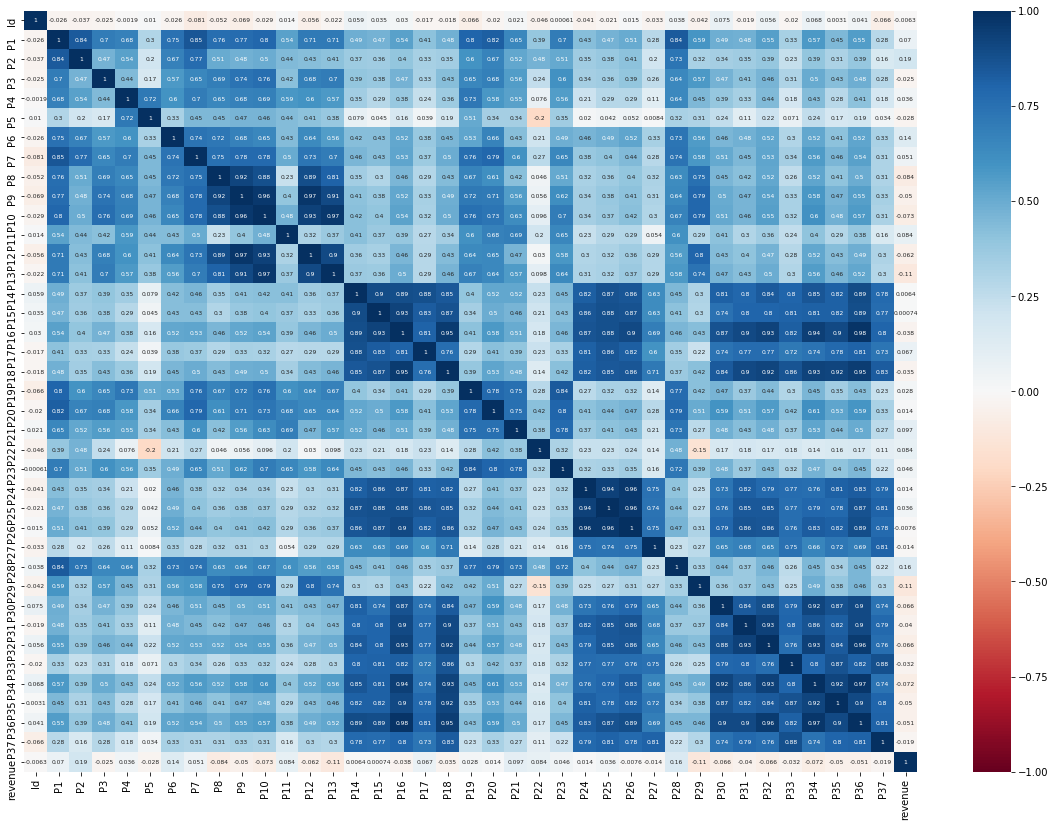

In [8]:
correlation = data.corr()
plt.figure(figsize=(20, 14))
sns.heatmap(correlation, annot=True,annot_kws={"size": 6}, linewidths=0, vmin=-1,cmap="RdBu")
plt.show()

In [12]:
data.dtypes
# 4 categorical features and others are numerical 

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

### Data Exploration - Correlation to Revenue sorted  

As a general guideline, we should keep those variables which show a decent or high correlation with the target variable. 


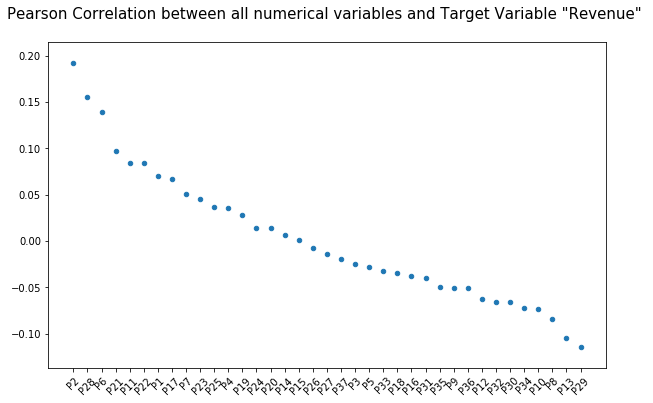

In [14]:
# Correlation of Numerical Features to Revenue 
numeric=data.select_dtypes(exclude=['object']).columns
numeric=numeric.drop(['revenue','Id'])  
corrcoef=[]
columns=[]
for column in numeric:
    r=np.corrcoef(data[column], data['revenue'])
    corrcoef.append(r[0,1])
    columns.append(column)

coerr_sorted={'Column':columns,'Pearson_Corr':corrcoef}
coerr_sorted=pd.DataFrame(coerr_sorted)
coerr_sorted=coerr_sorted.sort_values('Pearson_Corr',ascending=False)

plt.figure(figsize=(10, 6))
plt.scatter(coerr_sorted['Column'],coerr_sorted['Pearson_Corr'],s=20)
plt.xticks(rotation=45)
plt.title('Pearson Correlation between all numerical variables and Target Variable "Revenue" \n',fontsize=15)
plt.show()

Our target variable is revenue and it has a low correlation with each of the individual variables

Note: When you’re analyzing correlation, you should always have in mind that correlation does not indicate causation. It quantifies the strength of the relationship between the features of a dataset. Sometimes, the association is caused by a factor common to several features of interest.

### Let's now look at the categorical variables to and their relationship with the target value

Type
Open Date
City
City Group


### Type

Types of restaurants in training
 DT     1
FC    76
IL    60
Name: Type, dtype: int64


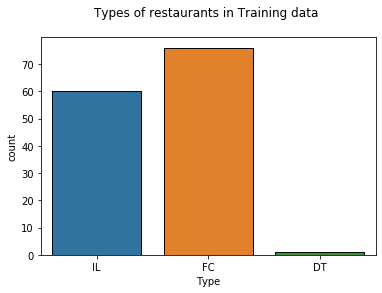

In [15]:
data_type_counts=data['Type'].value_counts() 
print("Types of restaurants in training\n",data_type_counts.sort_index())

sns.countplot(x='Type', data=data,edgecolor = 'black')#,color=(0.2, 0.4, 0.6, 0.6))
plt.title( "Types of restaurants in Training data \n")
plt.show()


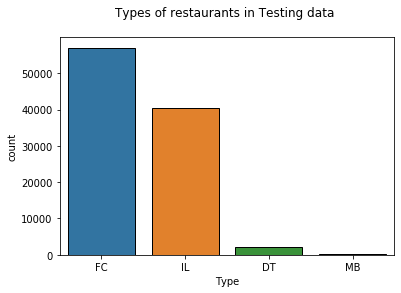

Types of restaurants in Testing data 
 DT     2244
FC    57019
IL    40447
MB      290
Name: Type, dtype: int64


In [16]:


sns.countplot(x='Type', data=test,edgecolor = 'black')#,color=(0.2, 0.4, 0.6, 0.6))
plt.title( "Types of restaurants in Testing data \n")
plt.show()


test_type_counts=test['Type'].value_counts() 

print("Types of restaurants in Testing data \n",test_type_counts.sort_index())

There isnt a MB type in the training set 

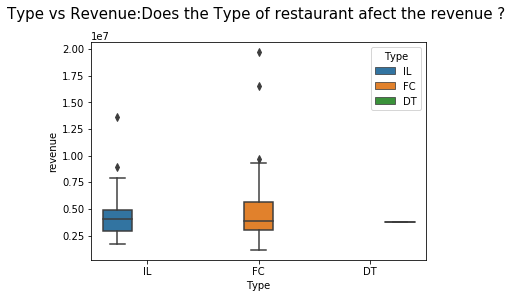

In [17]:
sns.boxplot(y='revenue', x='Type', data=data, hue='Type')
plt.title("Type vs Revenue:Does the Type of restaurant afect the revenue ? \n",fontsize=15)
plt.show()

In [18]:
data=data.drop(data[data['Type']=='DT'].index,axis=0)
test=test.drop(test[test['Type']=='DT'].index,axis=0)
test=test.drop(test[test['Type']=='MB'].index,axis=0)


It seems like are also some outliers. We can draw the revenue data points and see the spread corresponding to the distribution.

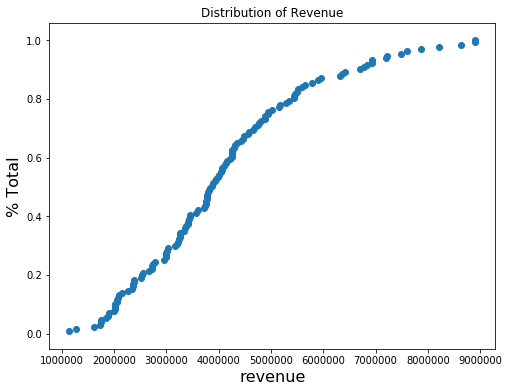

In [32]:
plt.figure(figsize=(8, 6))

import numpy as np
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

x,y=ecdf(data['revenue'])
plt.scatter(x=x, y=y)
plt.xlabel('revenue', fontsize=16)
plt.ylabel('% Total', fontsize=16)
plt.title('Distribution of Revenue')
plt.show()


Because the error is the squared distance between the data point and the predicted values, large distances have disproportionately large errors which cause the regression analysis to converge on a solution with a poor correlation coefficient. As such, outliers should ideally be removed from the data-set. That said, identifying outliers can be a somewhat tricky task. - Dropping the last few records with highest revenue will result in a more balanced  model 

In [30]:
data=data.drop(data[data['revenue']>9*10**6].index)

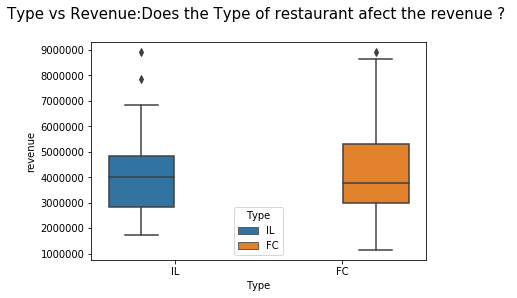

In [33]:
sns.boxplot(y='revenue', x='Type', data=data, hue='Type')
plt.title("Type vs Revenue:Does the Type of restaurant afect the revenue ? \n",fontsize=15)
plt.show()

## City/ City Group

In [34]:
my_order = data.groupby(by=['City'])['revenue'].median().sort_values(ascending=False).index
my_order

Index(['Elazığ', 'Edirne', 'Trabzon', 'Afyonkarahisar', 'Balıkesir',
       'İstanbul', 'Adana', 'Gaziantep', 'Bolu', 'İzmir', 'Muğla', 'Isparta',
       'Kayseri', 'Eskişehir', 'Karabük', 'Kocaeli', 'Antalya', 'Aydın',
       'Tekirdağ', 'Osmaniye', 'Bursa', 'Kastamonu', 'Şanlıurfa', 'Samsun',
       'Ankara', 'Sakarya', 'Kütahya', 'Amasya', 'Diyarbakır', 'Tokat',
       'Konya', 'Denizli', 'Uşak', 'Kırklareli'],
      dtype='object', name='City')

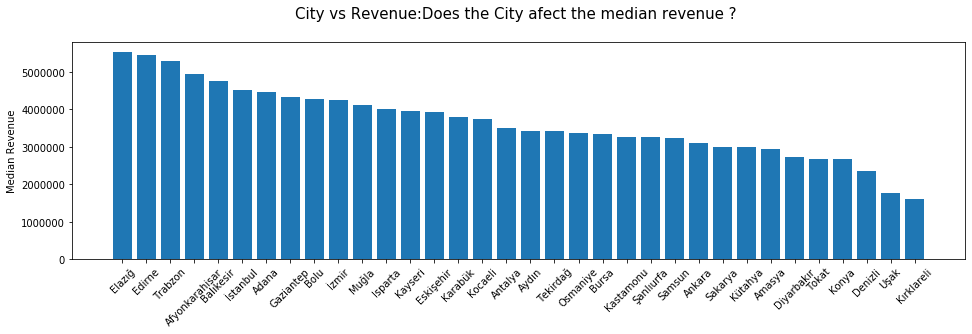

In [35]:
 plt.figure(figsize=(16, 4))
plt.title("City vs Revenue:Does the City afect the median revenue ? \n",fontsize=15)
plt.bar(my_order, data.groupby(by=['City'])['revenue'].median().sort_values(ascending=False) )
plt.ylabel('Median Revenue')
plt.xticks(rotation=45)
plt.show()

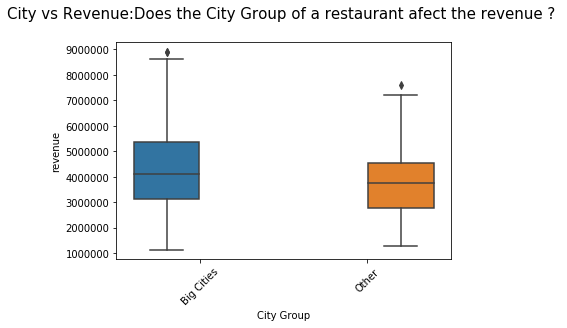

In [36]:
plt.figure(figsize=(6, 4))
plt.title("City vs Revenue:Does the City Group of a restaurant afect the revenue ? \n",fontsize=15)
sns.boxplot(y='revenue', x='City Group', data=data, hue='City Group')
plt.xticks(rotation=45)
plt.gca().legend_.remove()
plt.show()

## Open Date  - Transform Open date in Open Year 

In [37]:
data['Open_year']=data['Open Date'].str.slice(start=-4)
test['Open_year']=test['Open Date'].str.slice(start=-4)

In [38]:
print(len(data['Open_year'].unique()))
print(len(test['Open_year'].unique()))

17
20


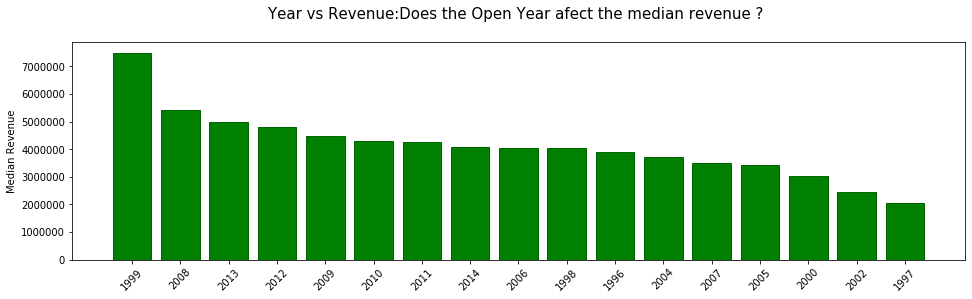

In [39]:
plt.figure(figsize=(16, 4))
plt.title("Year vs Revenue:Does the Open Year afect the median revenue ? \n",fontsize=15)
plt.bar(data['Open_year'].unique(), data.groupby(by=['Open_year'])['revenue'].median().sort_values(ascending=False),color='g',edgecolor='darkgreen' )
plt.ylabel('Median Revenue')
plt.xticks(rotation=45)
plt.show()

Open Year does have an impact in revenue - We can also expect slight decrease in revenue in those restaurants that opened recently. 

Text(0.5, 1.0, 'Real Revenue distribution')

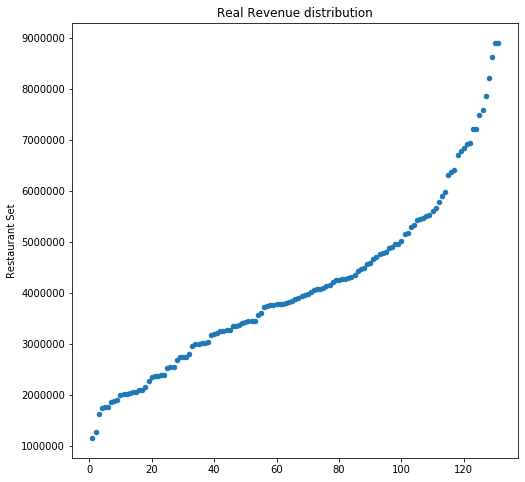

In [42]:
plt.figure(figsize=(8, 8))
x = np.linspace(1, 131, 131)
plt.scatter(x,data['revenue'].sort_values(), s=20)
##maybe add vlines here 
plt.ylabel('Revenue')
plt.ylabel('Restaurant Set')
plt.title('Real Revenue distribution')

In [43]:
len(data)

131

In [44]:
data.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue', 'Open_year'],
      dtype='object')

In [45]:
data_clean=data.copy()
test_clean=test.copy()

In [46]:
#Encode Categorical Features Data 
data_clean=pd.get_dummies(data_clean, columns=["City Group"])
data_clean=pd.get_dummies(data_clean, columns=["Type"])
data_clean=pd.get_dummies(data_clean, columns=["Open_year"])

#Encode Categorical Features Test 
test_clean=pd.get_dummies(test_clean, columns=["City Group"])
test_clean=pd.get_dummies(test_clean, columns=["Type"])
test_clean=pd.get_dummies(test_clean, columns=["Open_year"])

In [47]:
data_clean.columns

Index(['Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'City Group_Big Cities', 'City Group_Other', 'Type_FC',
       'Type_IL', 'Open_year_1996', 'Open_year_1997', 'Open_year_1998',
       'Open_year_1999', 'Open_year_2000', 'Open_year_2002', 'Open_year_2004',
       'Open_year_2005', 'Open_year_2006', 'Open_year_2007', 'Open_year_2008',
       'Open_year_2009', 'Open_year_2010', 'Open_year_2011', 'Open_year_2012',
       'Open_year_2013', 'Open_year_2014'],
      dtype='object')

In [48]:
test_clean.columns

Index(['Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'City Group_Big Cities', 'City Group_Other', 'Type_FC', 'Type_IL',
       'Open_year_1995', 'Open_year_1996', 'Open_year_1997', 'Open_year_1998',
       'Open_year_1999', 'Open_year_2000', 'Open_year_2001', 'Open_year_2002',
       'Open_year_2003', 'Open_year_2004', 'Open_year_2005', 'Open_year_2006',
       'Open_year_2007', 'Open_year_2008', 'Open_year_2009', 'Open_year_2010',
       'Open_year_2011', 'Open_year_2012', 'Open_year_2013', 'Open_year_2014'],
      dtype='object')

Years are different between data and test set. So we cant encode Years.


I am going to use Months - Open from Open Date. I could convert into days but that will add more variability to the feature and wont make much difference in the modelling output . 

I have to also transform the testing data with the same changes 

In [49]:
#Converting Open_Date into Open months count
data['Months_Open'] = round((pd.to_datetime('2015-01-01') - pd.to_datetime(data['Open Date'])).dt.days/30,0)
test['Months_Open'] = round((pd.to_datetime('2015-01-01') - pd.to_datetime(test['Open Date'])).dt.days/30,0)

In [50]:
data_clean=data.copy()
test_clean=test.copy()

#### Encoding again 

In [51]:
#Encode Categorical Features Data 
data_clean=pd.get_dummies(data_clean, columns=["City Group"])
data_clean=pd.get_dummies(data_clean, columns=["Type"])

#Encode Categorical Features Test 
test_clean=pd.get_dummies(test_clean, columns=["City Group"])
test_clean=pd.get_dummies(test_clean, columns=["Type"])


In [52]:
data_clean.columns

Index(['Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'Open_year', 'Months_Open', 'City Group_Big Cities',
       'City Group_Other', 'Type_FC', 'Type_IL'],
      dtype='object')

In [53]:
len(test_clean.columns)

46

In [54]:
len(data_clean.columns)

47

In [55]:
test_clean.columns

Index(['Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'Open_year', 'Months_Open', 'City Group_Big Cities', 'City Group_Other',
       'Type_FC', 'Type_IL'],
      dtype='object')

#### Dropping columns for final working data set 

In [56]:
X=data_clean.drop(columns=['Id','Open Date', 'City','Open Date','Open_year'])

# for the test - i keep the ID around to build the final prediction/submission
X_test_with_ID=test_clean.drop(columns=['Open Date', 'City','Open Date','Open_year'])

In [57]:
len(X.columns)

43

In [58]:
len(X_test_with_ID.columns)

43

### Now I have to split training further into training and testing 

In [59]:
Y=X['revenue']
X=X.drop(columns=['revenue'])

In [60]:
len(Y)

131

In [61]:
#import split the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) # 0.2 test_size means 20%
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(104, 42) (104,)
(27, 42) (27,)


### Scale the data using MinMaxScaler

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

### 1st algorithm  Random Forest Regression 

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 20, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 6, 8, 9, 11, 13, 14, 16, 18, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [108]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_ = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=20, n_jobs = -1)
#rf_random = GridSearchCV(rf,random_grid, cv = 2, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random_.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   28.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [109]:
rf_random_.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': True}

### Define an evaluation function 

In [67]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} .'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%. \n'.format(accuracy))
    return accuracy

### First, we are going to evaluate our RandomForestRegressor for both Training and Testing Samples 

Model Performance
Average Error: 441375.2674 .
Accuracy = 88.21%. 

Model Performance
Average Error: 538594.8563 .
Accuracy = 85.63%. 

For training data Improvement of -2.93%. 



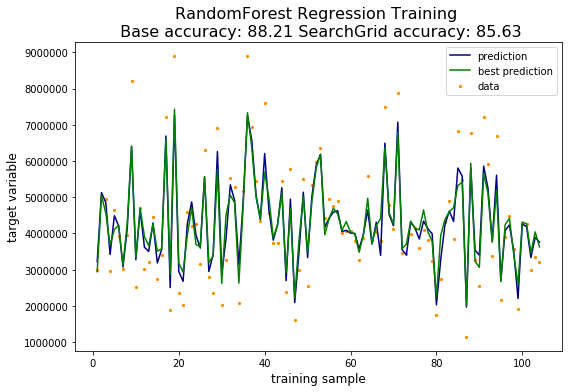

In [110]:
############## Start Model Evaluation ########################


##### Define and evaluate base model for RandomForestRegressor

base_model = RandomForestRegressor(n_estimators = 150, random_state = 20)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model,X_train, y_train)


##### Define and evaluate best model for RandomForestRegressor using best parameters found above 

best_random = rf_random_.best_estimator_
best_random.fit(X_train, y_train)
best_accuracy = evaluate(best_random, X_train, y_train)


print('For training data Improvement of {:0.2f}%. \n'.format( 100 * (best_accuracy - base_accuracy) / 
                                                             base_accuracy))

### Plot the difference between the data points and the predictions for both models 

x=np.linspace(1,104,104)
plt.figure(figsize=(8, 10)) 
plt.subplot(2, 1,2)
y_=base_model.predict(X_train)
y_b=best_random.predict(X_train)
plt.scatter(x, y_train, color='darkorange', label='data',s=5)
plt.plot(x, y_, color='navy', label='prediction')
plt.plot(x, y_b, color='green', label='best prediction')
plt.axis('tight')
plt.xlabel('training sample',fontsize=12)
plt.ylabel('target variable',fontsize=12)
plt.legend()
plt.title("RandomForest Regression Training \n Base accuracy: {:.2f} SearchGrid accuracy: {:.2f}".format(    
          base_accuracy,best_accuracy),fontsize=16)

plt.tight_layout()
plt.show()




Model Performance
Average Error: 1554763.0867 .
Accuracy = 38.26%. 

Model Performance
Average Error: 1575796.0718 .
Accuracy = 36.79%. 

For testing data Improvement of -3.84%.



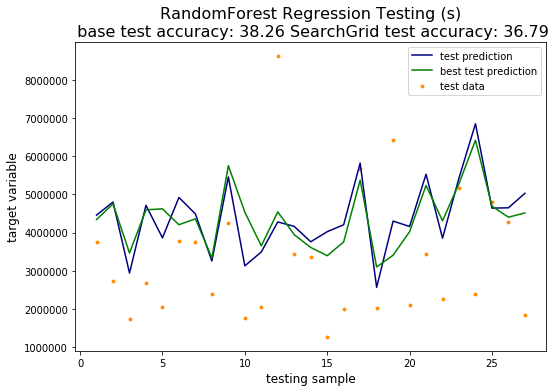

In [111]:

### And then we do the same for testing and evaluate  error and acuracy 

base_test_accuracy = evaluate(base_model,X_test, y_test)
best_test_accuracy = evaluate(best_random,X_test, y_test)
print('For testing data Improvement of {:0.2f}%.\n'.format( 100 * (best_test_accuracy - base_test_accuracy) / 
                                                         base_test_accuracy))


x=np.linspace(1,27,27)
plt.figure(figsize=(8, 10)) 
plt.subplot(2, 1,2)
y_t=base_model.predict(X_test)
y_t_b=best_random.predict(X_test)
plt.scatter(x, y_test, color='darkorange', label='test data',s=8)
plt.plot(x, y_t, color='navy', label='test prediction')
plt.plot(x, y_t_b, color='green', label='best test prediction')
plt.xlabel('testing sample',fontsize=12)
plt.ylabel('target variable',fontsize=12)
plt.axis('tight')
plt.legend()
#     plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
#                                                                 weights))
plt.title("RandomForest Regression Testing (s)\n base test accuracy: {:.2f} SearchGrid test accuracy: {:.2f}".format(    
          base_test_accuracy,best_test_accuracy),fontsize=16)

plt.tight_layout()
plt.show()

### 2nd Algorithm  GradientBoostingRegressor 

In [71]:

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
# Maximum number of levels in tree
learning_rate=[0.1,0.2,0.5,1]
max_depth = [int(x) for x in np.linspace(3, 50, num = 11)]
max_depth.append(None)
# Create the random grid
gbr_grid = {'n_estimators': n_estimators,
            'learning_rate': learning_rate,
             'max_depth': max_depth}
print(gbr_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000], 'learning_rate': [0.1, 0.2, 0.5, 1], 'max_depth': [3, 7, 12, 17, 21, 26, 31, 35, 40, 45, 50, None]}


In [72]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor


#Use the random grid to search for best hyperparameters
# First create the base model to tune
gbr = GradientBoostingRegressor(random_state=20)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = gbr_grid, n_iter = 100, cv = 3, verbose=2, random_state=20, n_jobs = -1)
# Fit the random search model
gbr_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   14.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [73]:
gbr_random.best_params_

{'n_estimators': 650, 'max_depth': 7, 'learning_rate': 0.1}

### Evaluation for GradientBoostingRegressor evaluate for both Training and Testing Samples using our evaluate function

Model Performance
Average Error: 270355.1650 .
Accuracy = 92.86%. 

Model Performance
Average Error: 0.0002 .
Accuracy = 100.00%. 

For training data Improvement of 7.69%. 



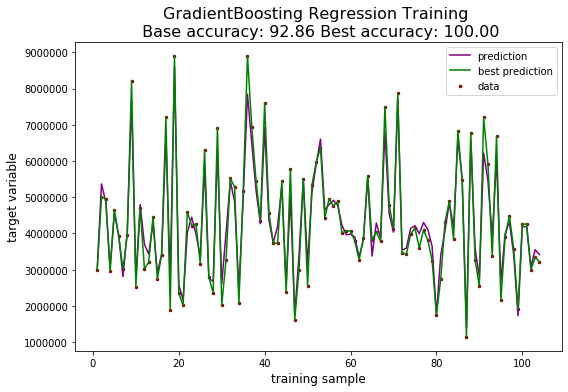

In [75]:

### And then we do the same for our last model Gradient Boosting and evaluate error and acuracy 

############## Start Model Evaluation ########################


grb_base= GradientBoostingRegressor(random_state=20)
grb_base.fit(X_train, y_train)
grb_base_accuracy = evaluate(grb_base,X_train, y_train)


##### Define and evaluate best model for GradientBoosting using best parameters found above 

grb_best = gbr_random.best_estimator_
grb_best.fit(X_train, y_train)
grb_best_accuracy = evaluate(grb_best, X_train, y_train)


print('For training data Improvement of {:0.2f}%. \n'.format( 100 * (grb_best_accuracy - grb_base_accuracy) / 
                                                             grb_base_accuracy))

### Plot the difference between the data points and the predictions for both models 

x=np.linspace(1,104,104)
plt.figure(figsize=(8, 10)) 
plt.subplot(2, 1,2)
y_=grb_base.predict(X_train)
y_b=grb_best.predict(X_train)
plt.scatter(x, y_train, color='darkred', label='data',s=6)
plt.plot(x, y_, color='purple', label='prediction')
plt.plot(x, y_b, color='green', label='best prediction')
plt.axis('tight')
plt.xlabel('training sample',fontsize=12)
plt.ylabel('target variable',fontsize=12)
plt.legend()
plt.title("GradientBoosting Regression Training \n Base accuracy: {:.2f} Best accuracy: {:.2f}".format(    
          grb_base_accuracy,grb_best_accuracy),fontsize=16)

plt.tight_layout()
plt.show()

Model Performance
Average Error: 1810073.7614 .
Accuracy = 26.35%. 

Model Performance
Average Error: 1452382.1186 .
Accuracy = 49.60%. 

For testing data Improvement of 88.22%. 



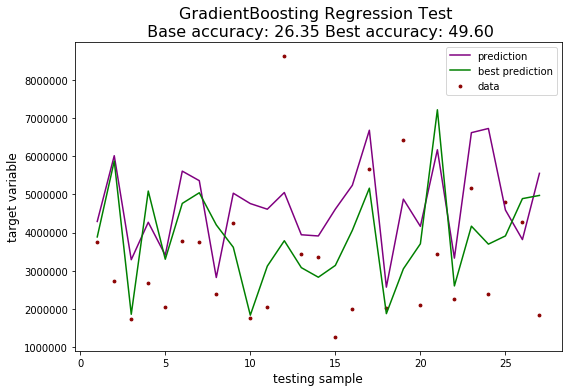

In [76]:
### Same for the testing data 

grb_base_accuracy = evaluate(grb_base,X_test, y_test)


##### Define and evaluate best model for GradientBoosting using best parameters found above 


grb_best_accuracy = evaluate(grb_best, X_test, y_test)


print('For testing data Improvement of {:0.2f}%. \n'.format( 100 * (grb_best_accuracy - grb_base_accuracy) / 
                                                             grb_base_accuracy))

### Plot the difference between the data points and the predictions for both models 

x=np.linspace(1,27,27)
plt.figure(figsize=(8, 10)) 
plt.subplot(2, 1,2)
y_=grb_base.predict(X_test)
y_b=grb_best.predict(X_test)
plt.scatter(x, y_test, color='darkred', label='data',s=8)
plt.plot(x, y_, color='purple', label='prediction')
plt.plot(x, y_b, color='green', label='best prediction')
plt.axis('tight')
plt.xlabel('testing sample',fontsize=12)
plt.ylabel('target variable',fontsize=12)
plt.legend()
plt.title("GradientBoosting Regression Test \n Base accuracy: {:.2f} Best accuracy: {:.2f}".format(    
          grb_base_accuracy,grb_best_accuracy),fontsize=16)

plt.tight_layout()
plt.show()

 ### Apply both models to our testing data set and export a submission file 

In [114]:


#PREPARE FOR SUBMISSION  Random Forest Regression

test_predicted_randomregression = pd.DataFrame()
test_predicted_randomregression['Id'] = X_test_with_ID.Id
test_predicted_randomregression['Prediction'] = base_model.predict(X_test_with_ID.drop('Id', axis=1))
test_predicted_randomregression.to_csv('ProjectSubmission_RandomF.csv')


#PREPARE FOR SUBMISSION Gradient Boosting Regression

test_predicted_gradientboosting = pd.DataFrame()
test_predicted_gradientboosting['Id'] = X_test_with_ID.Id
test_predicted_gradientboosting['Prediction'] = grb_best.predict(X_test_with_ID.drop('Id', axis=1))
test_predicted_gradientboosting.to_csv('ProjectSubmission_GradientBoosting.csv')



### Thank you ! 